# Loading Server-Side Files into Memory
[Getting Started with Python Integration to SAS® Viya® - Part 5 - Loading Server-Side Files into Memory](https://blogs.sas.com/content/sgf/2021/06/22/getting-started-with-python-integration-to-sas-viya-part-5-loading-server-side-files-into-memory/) blog post

## Import Packages
Visit the documentation for the SWAT [(SAS Scripting Wrapper for Analytics Transfer)](https://sassoftware.github.io/python-swat/index.html) package.

In [1]:
import swat
import os
import pandas as pd
import matplotlib.pyplot as plt

## custom personal module to connect to my CAS server environment
from casConnect import connect_to_cas 

## Make a Connection to CAS

##### To connect to the CAS server you will need:
1. the host name, 
2. the portnumber, 
3. your user name, and your password.

Visit the documentation [Getting Started with SAS® Viya® for Python](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg3/titlepage.htm) for more information about connecting to CAS.

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [2]:
##
## Connect to CAS
##

## General connection syntax
# conn = swat.CAS(host, port, username, password)

## SAS Viya for Learners 3.5 connection
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue, port=portValue, password=passwordToken)

## Personal connection using my custom module
conn = connect_to_cas()

type(conn)

swat.cas.connection.CAS

## Load the demonstration data

In [3]:
## Load demo data into the CAS server as a CAS table
conn.read_csv('https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/cars.csv',
              casout = {'name':'cars', 
                        'caslib':'casuser'})

## Reference the CAS table
cars = conn.CASTable('cars', caslib = 'casuser')

saveFileFormats = ['sashdat', 'csv', 'txt']
for fileType in saveFileFormats:
    cars.save(name=f'cars.{fileType}', caslib = 'casuser', replace=True)    

NOTE: Cloud Analytic Services made the uploaded file available as table CARS in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: The table CARS has been created in caslib CASUSER(Peter.Styliadis@sas.com) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services saved the file cars.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file cars.csv in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file cars.txt in caslib CASUSER(Peter.Styliadis@sas.com).


In [14]:
cars.to_csv(os.getcwd() + '\cars.txt', sep='|', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/Cars.txt'

'/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/Cars.txt'

In [50]:
conn.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,428,15,0,utf-8,2023-01-05T23:26:50+00:00,2023-01-05T23:26:50+00:00,2023-01-05T23:26:53+00:00,UTF8,1.988580e+09,0,0,0,,,0,Peter.Styliadis@sas.com,,2023-01-05T23:26:50+00:00,1.988580e+09
1,CARS_SAS,428,15,0,utf-8,2023-01-05T23:28:00+00:00,2023-01-05T23:28:00+00:00,2023-01-05T23:28:04+00:00,UTF8,1.988580e+09,0,0,0,cars.sas7bdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2022-08-16T21:25:39+00:00,1.976304e+09
2,CARS_CSV,428,15,0,utf-8,2023-01-05T23:28:30+00:00,2023-01-05T23:28:30+00:00,2023-01-05T23:28:30+00:00,UTF8,1.988581e+09,0,0,0,cars.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-05T23:26:52+00:00,1.988580e+09
3,CARS_TXT,428,1,0,utf-8,2023-01-05T23:39:13+00:00,2023-01-05T23:39:13+00:00,2023-01-05T23:40:58+00:00,UTF8,1.988581e+09,0,0,0,,,0,Peter.Styliadis@sas.com,,2023-01-05T23:39:13+00:00,1.988581e+09


In [48]:
conn.loadTable(path=, 
              importOptions = {'fileType':'csv', 
                               "delimiter":"|"},
              casout = {'name':'cars_txt', 
                        'caslib':'casuser'})
txt = conn.CASTable('cars_txt')
txt.head()

ERROR: The path specified relative to caslib CASUSER(Peter.Styliadis@sas.com): 'https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/cars.csv', contains multiple slashes, '.' or '..' references or is not valid for a file path.
ERROR: Access denied.
ERROR: The action stopped due to errors.


,"Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length"
0,"Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0..."
1,"Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,..."
2,"Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0..."
3,"Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,..."
4,"Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,3901..."


## Loading a SAS Data Set into Memory

In [18]:
conn.fileInfo(caslib="casuser")

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2022-10-21T15:02:13+00:00,1.981984e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-05T23:26:52+00:00,1.988580e+09


In [22]:
conn.loadTable(path="cars.sas7bdat", caslib="casuser",
               casOut={
                       "name":"cars_sas",
                       "caslib":"casuser"
               })

NOTE: Cloud Analytic Services made the file cars.sas7bdat available as table CARS_SAS in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'CARS_SAS'

[casTable]

 CASTable('CARS_SAS', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0809s, user: 0.0063s, sys: 0.0913s, mem: 13.2mb

In [23]:
cars = conn.CASTable("cars_sas",caslib="casuser")
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
2,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,35940.0,32506.0,1.8,4.0,170.0,23.0,30.0,3638.0,105.0,180.0
3,Audi,A6 3.0 4dr,Sedan,Europe,Front,36640.0,33129.0,3.0,6.0,220.0,20.0,27.0,3561.0,109.0,192.0
4,Audi,A6 2.7 Turbo Quattro 4dr,Sedan,Europe,All,42840.0,38840.0,2.7,6.0,250.0,18.0,25.0,3836.0,109.0,192.0


## Loading a CSV file into Memory

In [24]:
conn.loadTable(path="cars.csv", caslib="casuser",
           casOut={
                "name":"cars_csv",
                "caslib":"casuser"
           })
 
csv = conn.CASTable("cars_csv", caslib="casuser")
csv.head()

NOTE: Cloud Analytic Services made the file cars.csv available as table CARS_CSV in caslib CASUSER(Peter.Styliadis@sas.com).


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## Loading a Text file into Memory

In [60]:
colNames=['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
          'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
          'Weight', 'Wheelbase', 'Length']


conn.loadTable(path="cars_delim_bar.txt", caslib="casuser",
               casOut={
                   "name":"cars_text",
                   "caslib":"casuser",
                   "replace":True
               },
              importOptions={"fileType":"DELIMITED", 
                             "delimiter":"|", 
                             "getNames":False, 
                             "vars":colNames}
              )

NOTE: Cloud Analytic Services made the file cars_delim_bar.txt available as table CARS_TEXT in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'CARS_TEXT'

[casTable]

 CASTable('CARS_TEXT', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.00451s, user: 0.00353s, sys: 0.00555s, mem: 73.9mb

In [61]:
conn.tableInfo(caslib="casuser")

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS_SAS,428,15,0,utf-8,2021-08-10T16:11:14-04:00,2021-08-10T16:11:14-04:00,2021-08-10T16:11:14-04:00,UTF8,1.944245e+09,...,0,0,0,cars.sas7bdat,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2021-06-09T10:05:17-04:00,1.938867e+09
1,CARS_CSV,428,15,0,utf-8,2021-08-10T16:11:14-04:00,2021-08-10T16:11:14-04:00,2021-08-10T16:11:14-04:00,UTF8,1.944245e+09,...,0,0,0,cars.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2021-06-09T09:53:10-04:00,1.938866e+09
2,CARS_TEXT,428,15,0,utf-8,2021-08-10T16:11:15-04:00,2021-08-10T16:11:15-04:00,2021-08-10T16:11:15-04:00,UTF8,1.944245e+09,...,0,0,0,cars_delim_bar.txt,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2021-06-09T09:55:03-04:00,1.938866e+09


In [62]:
casTxt=conn.CASTable("cars_text",caslib="casuser")
casTxt.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [63]:
casTxt.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT,Skewness,Kurtosis
0,EngineSize,1.3,8.3,428.0,0.0,3.196729,1368.2,1.108595,0.053586,1.228982,4.898540e+03,5.247754e+02,34.679034,59.656105,3.133745e-209,0.708152,0.541944
1,Cylinders,3.0,12.0,426.0,2.0,5.807512,2474.0,1.558443,0.075507,2.428743,1.540000e+04,1.032216e+03,26.834946,76.913766,1.515569e-251,0.592785,0.440378
2,Horsepower,73.0,500.0,428.0,0.0,215.885514,92399.0,71.836032,3.472326,5160.415434,2.215110e+07,2.203497e+06,33.275059,62.173176,4.185344e-216,0.930331,1.552159
3,MPG_City,10.0,60.0,428.0,0.0,20.060748,8586.0,5.238218,0.253199,27.438924,1.839580e+05,1.171642e+04,26.111777,79.229235,1.866284e-257,2.782072,15.791147
4,MPG_Highway,12.0,66.0,428.0,0.0,26.843458,11489.0,5.741201,0.277511,32.961386,3.224790e+05,1.407451e+04,21.387709,96.729204,1.665621e-292,1.252395,6.045611
5,Weight,1850.0,7190.0,428.0,0.0,3577.953271,1531364.0,758.983215,36.686838,576055.520060,5.725125e+09,2.459757e+08,21.212776,97.526890,5.812547e-294,0.891824,1.688789
6,Wheelbase,89.0,144.0,428.0,0.0,108.154206,46290.0,8.311813,0.401767,69.086235,5.035958e+06,2.949982e+04,7.685150,269.196577,0.000000e+00,0.962287,2.133649
7,Length,143.0,238.0,428.0,0.0,186.362150,79763.0,14.357991,0.694020,206.151913,1.495283e+07,8.802687e+04,7.704349,268.525733,0.000000e+00,0.181977,0.614725


In [64]:
casTxt.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.350000,4.000000,165.000000,17.000000,24.000000,3103.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.500000,29.000000,3978.500000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [65]:
casTxt.Type.value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
dtype: int64

In [66]:
casTxt.freq(inputs=["Type","Drivetrain"])

,Column,CharVar,FmtVar,Level,Frequency
0,Type,Hybrid,Hybrid,1,3.0
1,Type,Sedan,Sedan,2,262.0
2,Type,Sports,Sports,3,49.0
3,Type,SUV,SUV,4,60.0
4,Type,Truck,Truck,5,24.0
5,Type,Wagon,Wagon,6,30.0
6,DriveTrain,All,All,1,92.0
7,DriveTrain,Front,Front,2,226.0
8,DriveTrain,Rear,Rear,3,110.0


In [67]:
df = casTxt.freq(inputs=["Type","Drivetrain"])['Frequency']

In [68]:
type(df)

swat.dataframe.SASDataFrame

In [69]:
Type=df.query('Column=="Type"')[["CharVar","Frequency"]]

<BarContainer object of 6 artists>

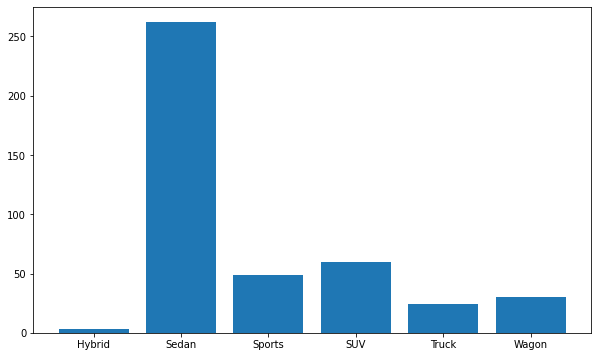

In [71]:
x=Type.CharVar
y=Type.Frequency

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x,y)